# Tidyverse para Análisis de Datos
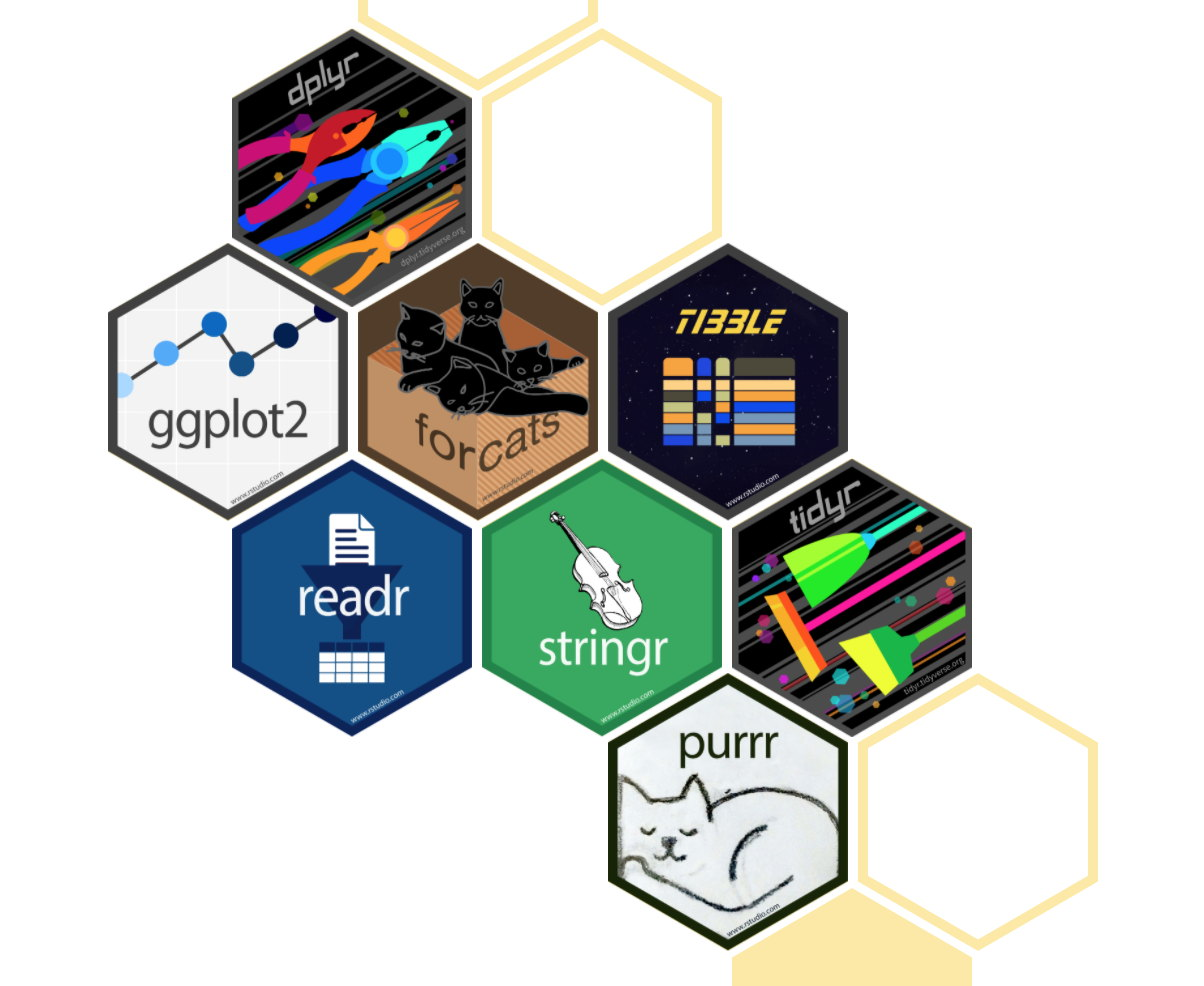
[Fuente](https://rpubs.com/paraneda/tidyverse)

R trabaja en forma preferente con datos tabulados (en forma de tablas) y su formato preferido es el dataframe. Los datos tabulados establecen:

* Cada variable esta almacenada en su propia columna.
* Cada observación esta almacenada en su propia fila.
* Cada tabla corresponde a un tipo de observación.

El análisis de los datos tiene como objetivo extraer información, por ello se requiere entre otras operaciones:
* Extraer las variables existentes en el conjunto de datos,
* Extraer las observaciones preexistentes,
* Derivar nuevas variables sobre las ya existentes y
* Cambiar las unidades de las variables.

# Tidyverse
Tidyverse es una colección de paquetes disponibles en R y orientados a la manipulación, importación, exploración y visualización de datos y que se utiliza exhaustivamente en ciencia de datos.

La forma más fácil es instalar tidyverse como paquete completo:
* install.packages("tidyverse")
* install.packages('gapminder')

Y después cargar las librerías:

In [1]:
library(tidyverse)
library(gapminder)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Dataset
Para el desarrollo de los ejemplos de este módulo se utilizará **Gapminder**, que es un set de datos poblacional, con información demográfica de todos los países desde 1952. Incluye información de cantidad de población, expectativa de vida e ingresos per cápita.

In [2]:
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


### Veamos el promedio de expectativa de vida, y el total de población, agrupados por país y por continente:

In [3]:
gapminder %>% group_by(country, continent) %>% 
  summarize(promedio = mean(lifeExp),
  total_pob = sum(as.numeric(pop))) %>% head()

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


country,continent,promedio,total_pob
<fct>,<fct>,<dbl>,<dbl>
Afghanistan,Asia,37.47883,189884585
Albania,Europe,68.43292,30962990
Algeria,Africa,59.03017,238504874
Angola,Africa,37.88350,87712681
Argentina,Americas,69.06042,343226879
Australia,Oceania,74.66292,175791750


### Para ver la estructura de este dataset:

In [4]:
str(gapminder)

tibble [1,704 × 6] (S3: tbl_df/tbl/data.frame)
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int [1:1704] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num [1:1704] 28.8 30.3 32 34 36.1 ...
 $ pop      : int [1:1704] 8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num [1:1704] 779 821 853 836 740 ...


# Pipeline
Desde el **paquete Dplyr**, “%>%” es una herramienta para la ejecución de pipeline (tuberías de comandos), que permite el encadenamiento de funciones de la forma:

In [5]:
gapminder %>%
  filter(year > 1985) %>%
  head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414
Afghanistan,Asia,1997,41.763,22227415,635.3414
Afghanistan,Asia,2002,42.129,25268405,726.7341
Afghanistan,Asia,2007,43.828,31889923,974.5803
Albania,Europe,1987,72.000,3075321,3738.9327


In [6]:
# Otro ejemplo con los datos mtcars:

mtcars %>%
  select(mpg, cyl, hp) %>%
  filter(hp > 150) %>%
  arrange(desc(hp))

,mpg,cyl,hp
,<dbl>,<dbl>,<dbl>
Maserati Bora,15.0,8,335
Ford Pantera L,15.8,8,264
Duster 360,14.3,8,245
Camaro Z28,13.3,8,245
Chrysler Imperial,14.7,8,230
Lincoln Continental,10.4,8,215
Cadillac Fleetwood,10.4,8,205
Merc 450SE,16.4,8,180
Merc 450SL,17.3,8,180


# Readr
Readr es el paquete orientado a facilitar la importación de datos de “tipo rectangular” (tablas)

La estructura obtenida es un Tibble, que es la implementación más avanzada de un data frame dentro de tidyverse. Posee ciertas diferencias con el data frame original entre las que se cuentan:

* No convierte los tipos de variables.
* No cambia los nombres de variables.
* Presenta en pantalla sólo las columnas que calzan en el ancho de ella.
* Muestra el tipo de variable.

Esta librería trata de estimar el tipo el tipo de dato de cada columna e intenta realizar una conversión de tipos cuando sea apropiado.

# read_csv()
Lectura de un archivo separado por comas “,”
Como la especificación de las columnas, pueden utilizarse estos en una nueva llamada, copiando estas especificaciones de columna.
read_csv("Demographics.csv", skip_empty_rows = TRUE) %>% head()

# utilizando las definiciones de columna obtenidas en codigo anterior.
* demographic <- read_csv("Demographics.csv", col_types = cols(
*   CustomerKey = col_double(),
*   MaritalStatus = col_character(),
*   Gender = col_character(),
*   EstimatedYearlyIncome = col_double(),
*   SentimentRating = col_double(),
*   WebActivity = col_double(),
*   NumberOfContracts = col_double(),
*   Age = col_double(),
*   Target = col_double(),
*   Available401K = col_double(),
*   CustomerValueSegment = col_double(),
*   ChurnScore = col_double(),
*   CallActivity = col_double()))

# read_csv2()
Es igual a read_csv, pero los datos deben estar separados por semicolon “;” (punto y coma)

# read_delim()
A diferencia de las versiones anteriores, esta permite especificar el carácter que delimita las columnas.
### read_delim("Demographics.csv",",") 

# read_fwf()
Esta función permite la lectura de archivos en los que las columnas tienen anchos fijos predeterminados.

Se puede agregar el argumento col_positions, y las funciones fwf_empty.

# read_tsv()
Para la lectura de archivos separados por TAB.

# read_log()
Permite la lectura de archivos de tipo log, utilizados en el despliegue de información de servicios tipo apache y similares. Si bien estos no presentan una estructura tabular a primera vista.

# Valores perdidos (missing values)
Este proceso es relevante en el análisis de datos

# Drop_na
Esta función simplemente elimina las filas que contienen valores “NA”
read_csv("Demographics.csv") %>% drop_na()

# Fill
Esta función completa los valores NA con los valores adyacentes, se puede especificar la busqueda hacia arriba o abajo de la fila con NA. Si no se especifica una dirección se toma “down” por default.

* down: llena los datos desde arriba hacia abajo
* up: completa los datos desde abajo hacia arriba
* downup: completa los datos faltantes en ambas direcciones.
* updown: completa los datos faltantes en ambas direcciones.

fill(data, column, direction) = c("down", "up", "downup", "updown"))

In [7]:
gapminder %>%
  fill(year) %>% head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


# Replace_na
Permite reemplazar los valores NA con determinados valores predefinidos. Si el argumento de datos es un dataframe retorna un dataframe, si es un vector retorna un vector.
* df <- tibble(read_csv("Demographics.csv")) %>% head()
* df %>% mutate(EstimatedYearlyIncome = replace_na(EstimatedYearlyIncome,0)) %>% head()

# Dplyr
El paquete dplyr entrega una serie de funciones para la manipulación de data frames. Los principales son:

arrange, count, filter, group, mutate, rename, select, summarize, %>% (pipe)

# Arrange()
Reordena los datos de una tabla en base a un conjunto de columnas o expresiones.

In [8]:
# desc() reordena en forma descendente (Z-A)
# arrange(dataframe, [col,])

arrange(gapminder, year, desc(lifeExp)) %>% head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Norway,Europe,1952,72.67,3327728,10095.422
Iceland,Europe,1952,72.49,147962,7267.688
Netherlands,Europe,1952,72.13,10381988,8941.572
Sweden,Europe,1952,71.86,7124673,8527.845
Denmark,Europe,1952,70.78,4334000,9692.385
Switzerland,Europe,1952,69.62,4815000,14734.233


# Count()
Realiza una contabilidad de registros (cuantos datos tiene, sin sumar números), creando una nueva columna.
### count(col, sort=TRUE|FALSE, name="")

In [9]:
# cantidad de registros por continente
# count(col, sort=TRUE|FALSE, name="")

gapminder %>%
  count(continent, sort = TRUE, name="registros")

continent,registros
<fct>,<int>
Africa,624
Asia,396
Europe,360
Americas,300
Oceania,24


# Filter()
Selecciona un subconjunto de datos, basados en una condición aplicada al set de datos originales.

*  En el ejemplo siguiente se seleccionarán los registros del año 2007 exclusivamente.
*  Uso de opción de acción directa:
*  filter(gapminder,year == 2007) %>% head()

In [10]:
# Uso de opcion con pipe "%>%"
gapminder %>% filter(year == 2007) %>% head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,2007,43.828,31889923,974.5803
Albania,Europe,2007,76.423,3600523,5937.0295
Algeria,Africa,2007,72.301,33333216,6223.3675
Angola,Africa,2007,42.731,12420476,4797.2313
Argentina,Americas,2007,75.320,40301927,12779.3796
Australia,Oceania,2007,81.235,20434176,34435.3674


In [11]:
# Y la forma equivalente de hacerlo sin sin dplyr es:

gapminder[gapminder$year==2007,] %>% head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,2007,43.828,31889923,974.5803
Albania,Europe,2007,76.423,3600523,5937.0295
Algeria,Africa,2007,72.301,33333216,6223.3675
Angola,Africa,2007,42.731,12420476,4797.2313
Argentina,Americas,2007,75.320,40301927,12779.3796
Australia,Oceania,2007,81.235,20434176,34435.3674


# Filtro múltiple: Seleccionar los registros del año 2007, correspondiente solamente al continente americano.

In [12]:
america <- gapminder %>% filter(year == 2007, continent=="Americas")
america %>% head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Argentina,Americas,2007,75.320,40301927,12779.380
Bolivia,Americas,2007,65.554,9119152,3822.137
Brazil,Americas,2007,72.390,190010647,9065.801
Canada,Americas,2007,80.653,33390141,36319.235
Chile,Americas,2007,78.553,16284741,13171.639
Colombia,Americas,2007,72.889,44227550,7006.580


In [13]:
# Selecciona los registros de 2007 de Americas y luego genera un subconjunto de datos.
gapminder %>% 
  filter(year == 2007, continent=="Americas") %>%
  dplyr::select(country, lifeExp, pop, gdpPercap) %>%
  head()

country,lifeExp,pop,gdpPercap
<fct>,<dbl>,<int>,<dbl>
Argentina,75.320,40301927,12779.380
Bolivia,65.554,9119152,3822.137
Brazil,72.390,190010647,9065.801
Canada,80.653,33390141,36319.235
Chile,78.553,16284741,13171.639
Colombia,72.889,44227550,7006.580


# Group_by()
Crea un subconjunto de filas en un nuevo dataset, en base a una agrupación de datos. Generalmente se usa en conjunto con summarize para obtener cálculos estadísticos de agrupaciones.

Para esto primero se debe agrupar con group_by y posteriormente summarize.

In [14]:
library(scales)
# Determinación del promedio de expectativa de vida y total de población
# "signif" limita los decimales

gapminder %>% 
  group_by(year) %>%
  summarize(meanLifeExp = signif(mean(lifeExp), digits=4), totalPop = sum(as.numeric(pop))) %>% head()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




year,meanLifeExp,totalPop
<int>,<dbl>,<dbl>
1952,49.06,2406957150
1957,51.51,2664404580
1962,53.61,2899782974
1967,55.68,3217478384
1972,57.65,3576977158
1977,59.57,3930045807


# Mutate()
Modifica y/o agrega nuevas variables (columnas), como resultado de funciones de variables previamente existentes.

In [15]:
# modifica columna "pop" dividiendo esta por 1 millón 
# agrega nueva columna "gdp" como resultante de gdpPercap * pop

gapminder %>% 
  mutate(pop = pop / 1000000, gdp = gdpPercap*pop) %>%
  head()

country,continent,year,lifeExp,pop,gdpPercap,gdp
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Asia,1952,28.801,8.425333,779.4453,6567.086
Afghanistan,Asia,1957,30.332,9.240934,820.8530,7585.449
Afghanistan,Asia,1962,31.997,10.267083,853.1007,8758.856
Afghanistan,Asia,1967,34.020,11.537966,836.1971,9648.014
Afghanistan,Asia,1972,36.088,13.079460,739.9811,9678.553
Afghanistan,Asia,1977,38.438,14.880372,786.1134,11697.659


In [16]:
# Si combinamos las funciones anteriores mediante %>%, tenemos:

gapminder %>% 
  mutate(pop = pop / 1000000, gdp = gdpPercap*pop) %>%
  filter(year==1952, continent=="Americas") %>%
  arrange(desc(pop)) %>%
  head()

country,continent,year,lifeExp,pop,gdpPercap,gdp
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
United States,Americas,1952,68.440,157.55300,13990.482,2204242.42
Brazil,Americas,1952,50.917,56.60256,2108.944,119371.65
Mexico,Americas,1952,50.789,30.14432,3478.126,104845.72
Argentina,Americas,1952,62.485,17.87696,5911.315,105676.32
Canada,Americas,1952,68.750,14.78558,11367.161,168070.12
Colombia,Americas,1952,50.643,12.35077,2144.115,26481.47


# Rename()
Renombra las columnas de un dataset. No agrega nuevas columnas o altera el orden de las filas de la columna modificada. Utiliza el formato:

rename(dataframe, nuevo_nombe = antiguo_nombre)

y tiene una alternativa para realizar el cambio mediante una función:

rename_with(dataframe, función)

In [17]:
rename(gapminder, life=lifeExp, population=pop) %>% head()

country,continent,year,life,population,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [18]:
# Cambio de nombre con función, emjemplo: cambia a mayúsculas los nombres de colummnas

rename_with(gapminder, toupper) %>% head()

# Para minúsculas sería lower

COUNTRY,CONTINENT,YEAR,LIFEEXP,POP,GDPPERCAP
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


# Sample_n()
Captura una muestra aleatoria de datos en una cantidad fija desde un dataset. Los argumentos que utiliza son el dataframa y el número de muestras a recolectar.

In [19]:
# recoge 5 datos aleatorios desde gapminder.

sample_n(gapminder, 5)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Tanzania,Africa,1997,48.466,30686889,789.1862
Benin,Africa,2002,54.406,7026113,1372.8779
"Korea, Dem. Rep.",Asia,1957,54.081,9411381,1571.1347
Trinidad and Tobago,Americas,1992,69.862,1183669,7370.9909
Tanzania,Africa,1977,49.919,17129565,962.4923


# Sample_frac()
Captura una muestra aleatoria de datos en una cantidad fija (%) desde un dataset.

In [20]:
sample_frac(gapminder, 0.2) %>% head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Mauritania,Africa,1967,46.289,1230542,1421.145
Chile,Americas,1967,60.523,8858908,5106.654
Thailand,Asia,1992,67.298,56667095,4616.897
Bulgaria,Europe,1982,71.080,8892098,8224.192
Brazil,Americas,2002,71.006,179914212,8131.213
Bahrain,Asia,1967,59.923,202182,14804.673


# Select()
Select() tiene como función realizar un subconjunto de los datos de un data frame, basados en la selección de un cierto conjunto de colummnas (variables) de el dataset original. Para ello utiliza como argumentos el dataset mismo y el conjunto de columnas.

El dataframe origen de la selección puede a su vez estar segmentado por ciertos filtros o funciones aplicadas a este, previo a realizar la selección de datos.

Existen funciones que complementan a select(), y estas son: starts_with(), ends_with(), matches() y contains(), para trabajar con grandes conjuntos de datos y variables.

In [21]:
# Seleccion sobre el dataset "gapminder" de ciertas columnas específicas:

select(gapminder, country, year, pop, gdpPercap) %>% head()

country,year,pop,gdpPercap
<fct>,<int>,<int>,<dbl>
Afghanistan,1952,8425333,779.4453
Afghanistan,1957,9240934,820.8530
Afghanistan,1962,10267083,853.1007
Afghanistan,1967,11537966,836.1971
Afghanistan,1972,13079460,739.9811
Afghanistan,1977,14880372,786.1134


In [22]:
# También se puede generar sobre datos tratados previamente.
# Por ejemplo: filtrar los datos por año, y luego seleccionar las columnas a mostrar:

dplyr::select(gapminder %>% filter(year == 2007), country,continent,pop, gdpPercap) %>% head()

country,continent,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>
Afghanistan,Asia,31889923,974.5803
Albania,Europe,3600523,5937.0295
Algeria,Africa,33333216,6223.3675
Angola,Africa,12420476,4797.2313
Argentina,Americas,40301927,12779.3796
Australia,Oceania,20434176,34435.3674


In [23]:
# Aplicar doble filtro, year y continente, antes de seleccionar las columnas requeridas:

dplyr::select(gapminder %>% 
  filter(year == 2007, continent=="Asia"), country, lifeExp, pop, gdpPercap) %>% 
  head()

country,lifeExp,pop,gdpPercap
<fct>,<dbl>,<int>,<dbl>
Afghanistan,43.828,31889923,974.5803
Bahrain,75.635,708573,29796.0483
Bangladesh,64.062,150448339,1391.2538
Cambodia,59.723,14131858,1713.7787
China,72.961,1318683096,4959.1149
"Hong Kong, China",82.208,6980412,39724.9787


# Summarize()
Condensa múltiples valores en un único valor. Puede usarse con las funciones “mean”, “sum”, “median”, “min” y “max”.
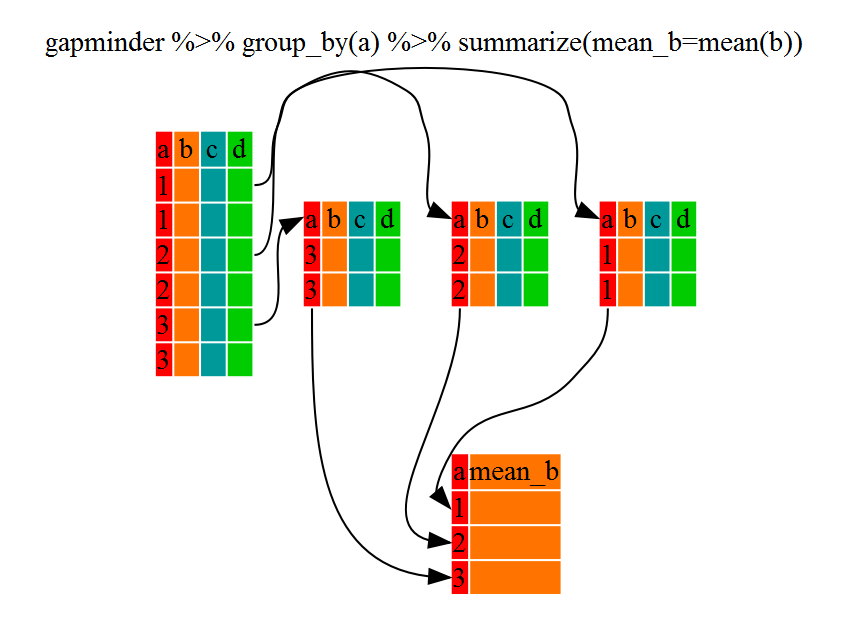

In [24]:
# Promedio de expectativa de vida, y población total, en el año 2007:

gapminder %>%
  filter(year == 2007) %>% 
  summarize(meanLifeExp = mean(lifeExp),
            totalPop = sum(as.numeric(pop)))

meanLifeExp,totalPop
<dbl>,<dbl>
67.00742,6251013179


# Transmute()
Realiza modificaciones, manteniendo solamente las variables creadas, y omitiendo las restantes.

In [25]:
gapminder %>%
  transmute(population = pop /1000000, lifeExp) %>% head()

population,lifeExp
<dbl>,<dbl>
8.425333,28.801
9.240934,30.332
10.267083,31.997
11.537966,34.020
13.079460,36.088
14.880372,38.438


# Forcats
Trabaja con variables categóricas, que R utiliza como factores. Variables limitadas a un cierto rango de valores.

* fct_reorder(): Reordenar un factor por otra variable.
* fct_infreq(): Reordenar un factor por la frecuencia de los valores.
* fct_relevel(): Cambiar el orden de un factor a mano.
* fct_lump(): Colapsar los valores menos/más frecuentes de un factor en “otro”.

In [26]:
library(forcats)

gapminder %>%
 mutate(continente = fct_infreq(continent)) %>% head()

country,continent,year,lifeExp,pop,gdpPercap,continente
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>
Afghanistan,Asia,1952,28.801,8425333,779.4453,Asia
Afghanistan,Asia,1957,30.332,9240934,820.8530,Asia
Afghanistan,Asia,1962,31.997,10267083,853.1007,Asia
Afghanistan,Asia,1967,34.020,11537966,836.1971,Asia
Afghanistan,Asia,1972,36.088,13079460,739.9811,Asia
Afghanistan,Asia,1977,38.438,14880372,786.1134,Asia


# Ggplot2
Es una librería de amplio uso en la visualización de datos.

ggplot(dataset, estetica) + geometría + opciones + facetas

* Dataset: siempre una tabla de datos.
* Estética, aporta elementos para mostrar gráficamente (la posición x e y, el color, etc.) y especifica las columnas de el dataset.
* Geometrías (o capas): define el tipo de gráfico a representar.
* Opciones: agrega oros elementos adicionales que permiten mejorar el diseño del gráfico.
* Facetas: parten un gráfico en sublienzos preservando las escalas (pequeños múltiplos).

Estética: aes(argumentos), donde argumentos puede involucrar:

*  x = columna1, y = columna2
*  color = continent
*  size = pop

Modalidades:

* geom_point() : dispersiograma
* geom_line() : lineas
* geom_col() : columnas
* geom_histogram() : histogramas
* geom_boxplot() : boxplot

Las “opciones” incluyen:

*  expand_limits(y = 0)
*  scale_x_log10() : escala logaritmica para el eje x
*  scale_y_log10() : escala logaritmica para el eje y

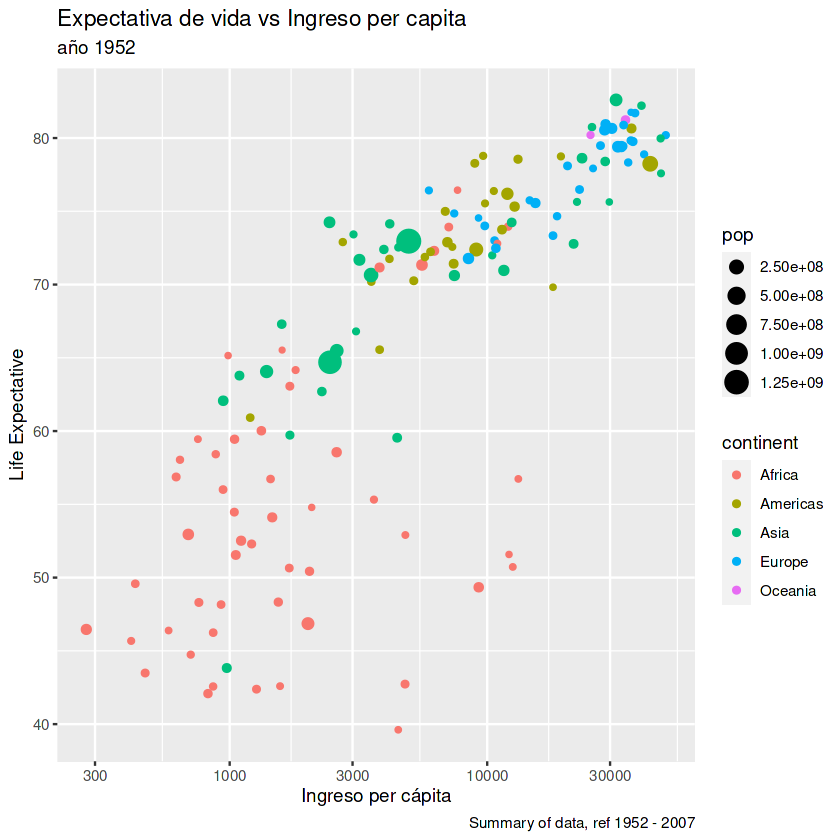

In [27]:
library('ggplot2')

# Ejemplo de Creación de un subset con los datos de 1952:

gapminder_1952 <- gapminder %>% filter(year == 2007)

# Graficar la expectativa de vida "lifeExp" vs ingreso por cápita "gdpPercap":
ggplot(gapminder_1952, 
       aes(x = gdpPercap, y = lifeExp, 
       color = continent, # aplica colores basado en agrupacón de continentes
       size = pop)) + #define el tamaño de los puntos en base a población
  geom_point() +
  scale_x_log10() + 
# opcional
  labs(
    title = "Expectativa de vida vs Ingreso per capita",
    subtitle = "año 1952",
    caption = "Summary of data, ref 1952 - 2007",
    x = "Ingreso per cápita",
    y = "Life Expectative")

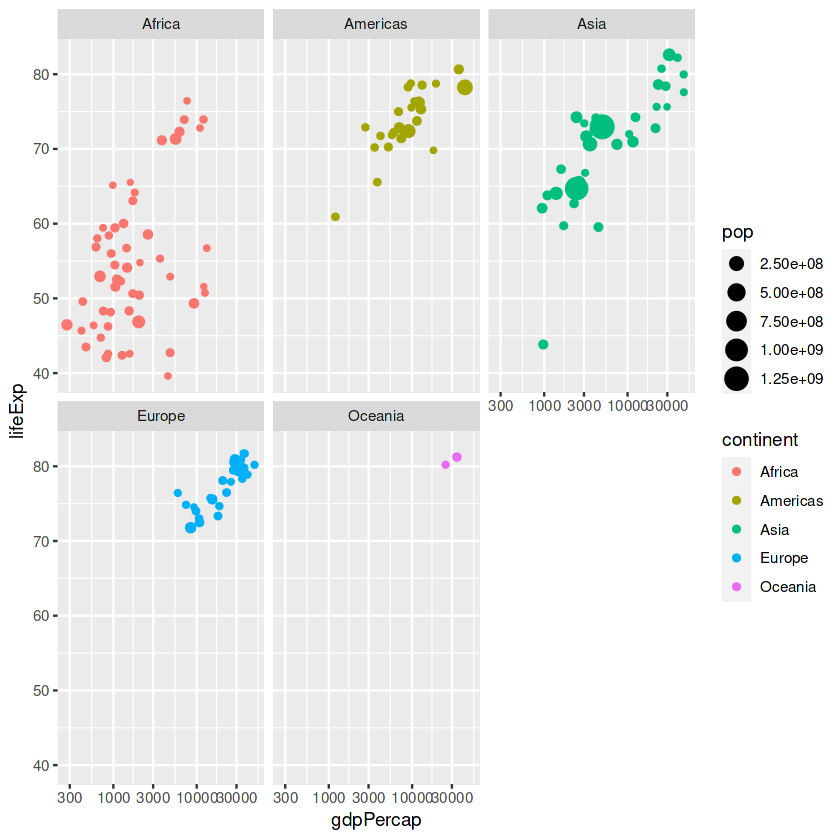

In [28]:
# Creación de un subset con los datos de 1952
gapminder_1952 <- gapminder %>% filter(year == 2007)

# Graficar expectativa de vida "lifeExp" vs ingreso por cápita "gdpPercap"
ggplot(gapminder_1952, 
       aes(x = gdpPercap, y = lifeExp, 
           color = continent,
           size = pop)) + 
  geom_point() +
  scale_x_log10() +
  facet_wrap(~ continent)

# map()
Estas funciones aplican una función a cada elemento de una lista. Posee diversas variaciones: map_lgl(), map_int(), map_doubl() y map_chr(), que retornan un objeto del tipo que indican.

Argumentos:

map(x, function, …)

* donde x es una lista o un vector.
* function es una función, formula o un vector. Si es una formula (x+2) se convieerte en una función.

In [29]:
# Determinar la cantidad de valores distintos en cada columna con n_distinct(), usamos map_dbl ya que n_distinct retorna un numero de tipo doble.
gapminder %>% map_dbl(n_distinct)

country continent      year   lifeExp       pop gdpPercap 
      142         5        12      1626      1704      1704

In [30]:
# Detectar el tipo de cada columna
gapminder %>% map_chr(class)

country continent      year   lifeExp       pop gdpPercap 
 "factor"  "factor" "integer" "numeric" "integer" "numeric"

In [31]:
# Promedio de expextativa de vida, agrupado por continente. En este caso el punto "." es una abreviación del uso del dataframe gapminder.
gapminder %>% split(.$continent) %>%
  map(~ mean(.$lifeExp))

$Africa
[1] 48.86533

$Americas
[1] 64.65874

$Asia
[1] 60.0649

$Europe
[1] 71.90369

$Oceania
[1] 74.32621

# Stringr
Permite una serie de funciones sobre caracteres, haciendo la manipulación de string más eficiente.

# str_c()
Genera un caden de texto con separador, indicado en argumento collapse.

In [32]:
str_c(america$country, collapse = ", ")

[1] "Argentina, Bolivia, Brazil, Canada, Chile, Colombia, Costa Rica, Cuba, Dominican Republic, Ecuador, El Salvador, Guatemala, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Paraguay, Peru, Puerto Rico, Trinidad and Tobago, United States, Uruguay, Venezuela"

# str_detect()
Busca la ocurrencia del patrón dentro del texto: str_detect(texto, patron)

In [33]:
str_detect(america$country, "[zy]")

[1] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
[25]  TRUE

# str_count()
Contabiliza el número de ocurrencias del patrón dentro de el texto.

In [34]:
str_count(america$country, "[zy]")

[1] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1

# str_locate()
Busca en qué posición se ecnuentra el patrón indicado.

In [35]:
str_locate(america$country, "[zy]") %>% head()

start,end
NA,NA
NA,NA
4,4
NA,NA
NA,NA
NA,NA


# str_replace()
Reemplaza el texto seleccionado, mediante un patrón: str_replace(x, pattern, replacement)

In [36]:
str_replace(america$country, "[aeiou]", "?")

[1] "Arg?ntina"           "B?livia"             "Br?zil"             
 [4] "C?nada"              "Ch?le"               "C?lombia"           
 [7] "C?sta Rica"          "C?ba"                "D?minican Republic" 
[10] "Ec?ador"             "El S?lvador"         "G?atemala"          
[13] "H?iti"               "H?nduras"            "J?maica"            
[16] "M?xico"              "N?caragua"           "P?nama"             
[19] "P?raguay"            "P?ru"                "P?erto Rico"        
[22] "Tr?nidad and Tobago" "Un?ted States"       "Ur?guay"            
[25] "V?nezuela"

# str_split()
Realiza una separación del texto según un caracter delimitador.

In [37]:
str_split(c("a,b", "c,d,e"), ",")

[[1]]
[1] "a" "b"

[[2]]
[1] "c" "d" "e"

# Tibble
Es una moderna reimaginación del marco de datos, manteniendo lo que el tiempo ha demostrado ser efectivo, y desechando lo que no lo es.

Tibbles son data.frames que son perezosos y malhumorados: hacen menos (es decir, no cambian los nombres o tipos de variables, y no hacen coincidencias parciales) y se quejan más (por ejemplo, cuando una variable no existe). Esto les obliga a enfrentarse a los problemas antes, lo que normalmente conduce a un código más limpio y expresivo.

Proporciona además una nueva clase de objeto tabular de datos, y realiza algunas mejoras:

* Siempre retorna un tibble.
* Siempre utiliza el nombre completo de las columnas.
* Presenta una vista más consistente de los datos en formato de tabla.
* Mejora el control de la apariencia mediante opciones.
* Es reversible a data frame con as.data.frame()

In [38]:
library(tibble)
as_tibble(gapminder) %>% head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [39]:
# Tibble se puede aplicar sobre dataframes, listas, matrices o tablas. Además, se puede crear desde vectores.

tibble(x = 1:5, y = 1, z = x ^ 2 + y)

x,y,z
<int>,<dbl>,<dbl>
1,1,2
2,1,5
3,1,10
4,1,17
5,1,26


In [40]:
# También se puede definir un objeto línea a línea con tribble():

tribble(
  ~x, ~y,  ~z,
  "a", 2,  3.6,
  "b", 1,  8.5
)

x,y,z
<chr>,<dbl>,<dbl>
a,2,3.6
b,1,8.5


# Tidyr
Tidyr permite facilitar la creación de tablas de datos.

Permite organizar datos tabulares.

Requerimientos:

Los datos considerados como tabulares para su uso en tidyr deben cumplir con lo siguiente:

* cada variable corresponde a una columna.
* cada observación, caso o registro es una línea de la tabla.

Las funciones esenciales de Tidyr se agrupan en 5 áreas:
1. Pivoting para transformar tablas en cuanto a su disposición, ancho o largo;
2. Rectangular: crear tablas desde listas anidadas (ejemplo, datos en JSON);
3. Anidar grupos de datos;
4. Combinar valores de columnas de caracteres; y
5. Determinar valores de valores perdidos (missing values) en forma explicita.

# gather()
Reorganiza los datos en una tabla para que conformen la necesidad de estar en forma tabulada (tidy).


# spread()
Transforma los datos de una tabla (data frame) en una nueva, organizada en nuevas columnas.

# separate()
Permite separar los valores de una columna, basado en un caracter que actúa como separador. Se utiliza frecuentemente en valores de tipo caracter.

separate(datos, columna, c(“nueva1”, “nueva2”, “nuevan”), sep = “-”)

Ejmplo: separate(gapminder, fecha, c("year", "month", "day"), sep = "-")

Si tenemos una columna direccion con valores llenados del tipo “direccíon, locación/ciudad, comuna” y deseamos separarlas para obtener en forma separada la ciudad y comuna establecemos:

ejemplo:“colo colo 357 depto. 33A, San Pedro Costa, San Pedro de la Paz”

separate(clientes, direccion, c("dirección", "locacion", "comuna"), sep = ",")

# unite()
Función recíproca de separate() que unifica en una nueva columna otras existentes.

Ejmplo: fusiona tres columnas: year, month y day, en una nueva columna "fecha".
unite(datos, "fecha", year, month, day, sep = "-")

# pivot
Las funciones pivot cambian las posiciones entre filas y columnas. rotando en 90 grados.
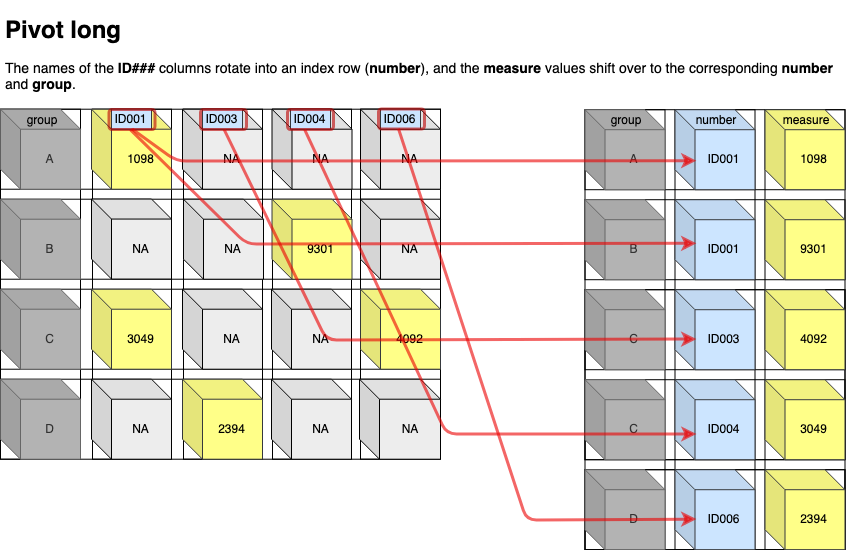
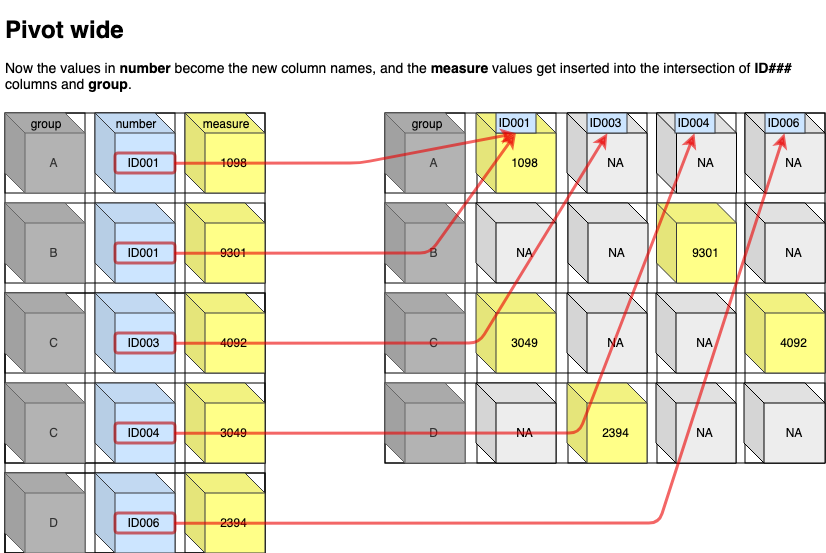

# pivot_longer()
Transforma una agrupacion de datos en tabla aumentando el numero de filas y reduciendo la cantidad de columnas. Pivot es entendida como girar una tabla desplazando sus filas y columnas.

In [41]:
# relig_income es un dataset de una encuesta de ingresos vs religión, donde en columnas se establece la categoría de ingreso.
relig_income %>% head()

religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Agnostic,27,34,60,81,76,137,122,109,84,96
Atheist,12,27,37,52,35,70,73,59,74,76
Buddhist,27,21,30,34,33,58,62,39,53,54
Catholic,418,617,732,670,638,1116,949,792,633,1489
Don’t know/refused,15,14,15,11,10,35,21,17,18,116
Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529


In [42]:
# Utilizaremos pivot_longer() para cambiar todas las columnas, a excepción de religion (!religion)

# "names_to" determina la columna a ser creada, y "values_to" el tipo de valor en las celdas

relig_income %>% pivot_longer(cols= !religion, names_to = "Income", values_to = "Count")  %>% head()

religion,Income,Count
<chr>,<chr>,<dbl>
Agnostic,<$10k,27
Agnostic,$10-20k,34
Agnostic,$20-30k,60
Agnostic,$30-40k,81
Agnostic,$40-50k,76
Agnostic,$50-75k,137


# pivot_wider()
Realiza la transformación inversa a pivot_longer(), y genera un dataframe más ancho que alto. Transformando valores de filas a más columnas.

In [43]:
# tabla original con year en una columna.
gapminder %>% head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [44]:
# Creamos una selección de campos para establecer el gdpPercap, en base a los años entre 1952 y 2007 en columna, y el valor gdpPerCap como valor de cada celda:

gapminder %>% select(country, year, gdpPercap) %>%
pivot_wider(names_from = year, values_from=gdpPercap) %>% head()

country,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,779.4453,820.853,853.1007,836.1971,739.9811,786.1134,978.0114,852.3959,649.3414,635.3414,726.7341,974.5803
Albania,1601.0561,1942.284,2312.8890,2760.1969,3313.4222,3533.0039,3630.8807,3738.9327,2497.4379,3193.0546,4604.2117,5937.0295
Algeria,2449.0082,3013.976,2550.8169,3246.9918,4182.6638,4910.4168,5745.1602,5681.3585,5023.2166,4797.2951,5288.0404,6223.3675
Angola,3520.6103,3827.940,4269.2767,5522.7764,5473.2880,3008.6474,2756.9537,2430.2083,2627.8457,2277.1409,2773.2873,4797.2313
Argentina,5911.3151,6856.856,7133.1660,8052.9530,9443.0385,10079.0267,8997.8974,9139.6714,9308.4187,10967.2820,8797.6407,12779.3796
Australia,10039.5956,10949.650,12217.2269,14526.1246,16788.6295,18334.1975,19477.0093,21888.8890,23424.7668,26997.9366,30687.7547,34435.3674


In [45]:
# idem a lo anterior, pero esta vez colocamos como valor la expectativa de vida:

gapminder %>% select(country, year, lifeExp) %>%
pivot_wider(names_from = year, values_from=lifeExp) %>% head()

country,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
Australia,69.120,70.330,70.930,71.100,71.930,73.490,74.740,76.320,77.560,78.830,80.370,81.235
